# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## Contents
  * [3.1 Introduction](#3.1)
  * [3.2 Imports](#3.2)
  * [3.3 Load The Data](#3.3)
  * [3.4 Explore The Data](#3.4)
    * [3.4.1 Target variable G3](#3.4.1)
    * [3.4.2 Dependent variables](#3.4.2)
      * [3.4.2.1 Continuous variables](#3.4.2.1)
      * [3.4.2.2 Categorical variables](#3.4.2.2)
  * [3.5 Summary](#3.5)


## 3.1 Introduction<a id='3.1'></a>

This notebook includes the procedure for EDA on the student dataset. The objective is to explore the characteristics of featuers and the correlations among features. Certain content may be overlapped with Data Wrangling notebook.

## 3.2 Imports<a id='3.2'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

from library.sb_utils import save_file

## 3.3 Load The Data<a id='3.3'></a>

In [2]:
student_data = pd.read_csv('../data/student_data_cleaned.csv')

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      357 non-null    object
 1   sex         357 non-null    object
 2   age         357 non-null    int64 
 3   address     357 non-null    object
 4   famsize     357 non-null    object
 5   Pstatus     357 non-null    object
 6   Medu        357 non-null    int64 
 7   Fedu        357 non-null    int64 
 8   Mjob        357 non-null    object
 9   Fjob        357 non-null    object
 10  reason      357 non-null    object
 11  guardian    357 non-null    object
 12  traveltime  357 non-null    int64 
 13  studytime   357 non-null    int64 
 14  failures    357 non-null    int64 
 15  schoolsup   357 non-null    object
 16  famsup      357 non-null    object
 17  paid        357 non-null    object
 18  activities  357 non-null    object
 19  nursery     357 non-null    object
 20  higher    

**Column explanation**

In [5]:
# input student data column information which are available at UCI Machine Learning Repository.
col_info = pd.read_csv('..\data\data_columns.csv').T
col_info.columns = col_info.iloc[1]
col_info = col_info.drop(index = ['order','name'], axis=0)
# use the code below to decode the column name explanation
print(col_info.higher)

col_info.head()

meaning     wants to take higher education 
notes                     binary: yes or no
Name: higher, dtype: object


name,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
meaning,student's school,student's sex,student's age,student's home address type,family size,parent's cohabitation status,mother's education,father's education,mother's job,father's job,...,quality of family relationships,free time after school,going out with friends,workday alcohol consumption,weekend alcohol consumption,current health status,number of school absences,first period grade,second period grade,final grade
notes,binary: 'GP' - Gabriel Pereira or 'MS' - Mousi...,binary: 'F' - female or 'M' - male,numeric: from 15 to 22,binary: 'U' - urban or 'R' - rural,binary: 'LE3' - less or equal to 3 or 'GT3' - ...,binary: 'T' - living together or 'A' - apart,"numeric: 0 - none, 1 - primary education 4th g...","numeric: 0 - none, 1 - primary education 4th g...","nominal: 'teacher', 'health' care related, civ...","nominal: 'teacher', 'health' care related, civ...",...,numeric: from 1 - very bad to 5 - excellent,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very low to 5 - very high,numeric: from 1 - very bad to 5 - very good,numeric: from 0 to 93,numeric: from 0 to 20,numeric: from 0 to 20,"numeric: from 0 to 20, output target"


From the types and information of columns, we can split features into two groups:
- Continuous numerical features: age, absences, G1, G2, and G3
- Categorical features: the rest of features.

## 3.4 Explore The Data<a id='3.4'></a>

### 3.4.1 Target variable G3<a id='3.4.1'></a>

Among 33 features, we chose the G3 as the the target variable. Based on its histogram, we may treat it as a continuous variable for regression.

In [6]:
Target = student_data['G3']

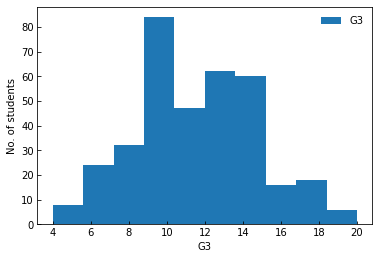

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.hist(Target, label='G3')
ax1.tick_params(axis="x", direction="in")
ax1.tick_params(axis="y", direction="in")
ax1.set_xlabel('G3')
ax1.set_ylabel('No. of students')
ax1.legend(frameon=False,shadow=True)

plt.show();

In [8]:
Target.describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

### 3.4.2 Dependent variables<a id='3.4.2'></a>

To explore the correlations among the target variable and the dependent variables, we use the pariplot to visualize the data.

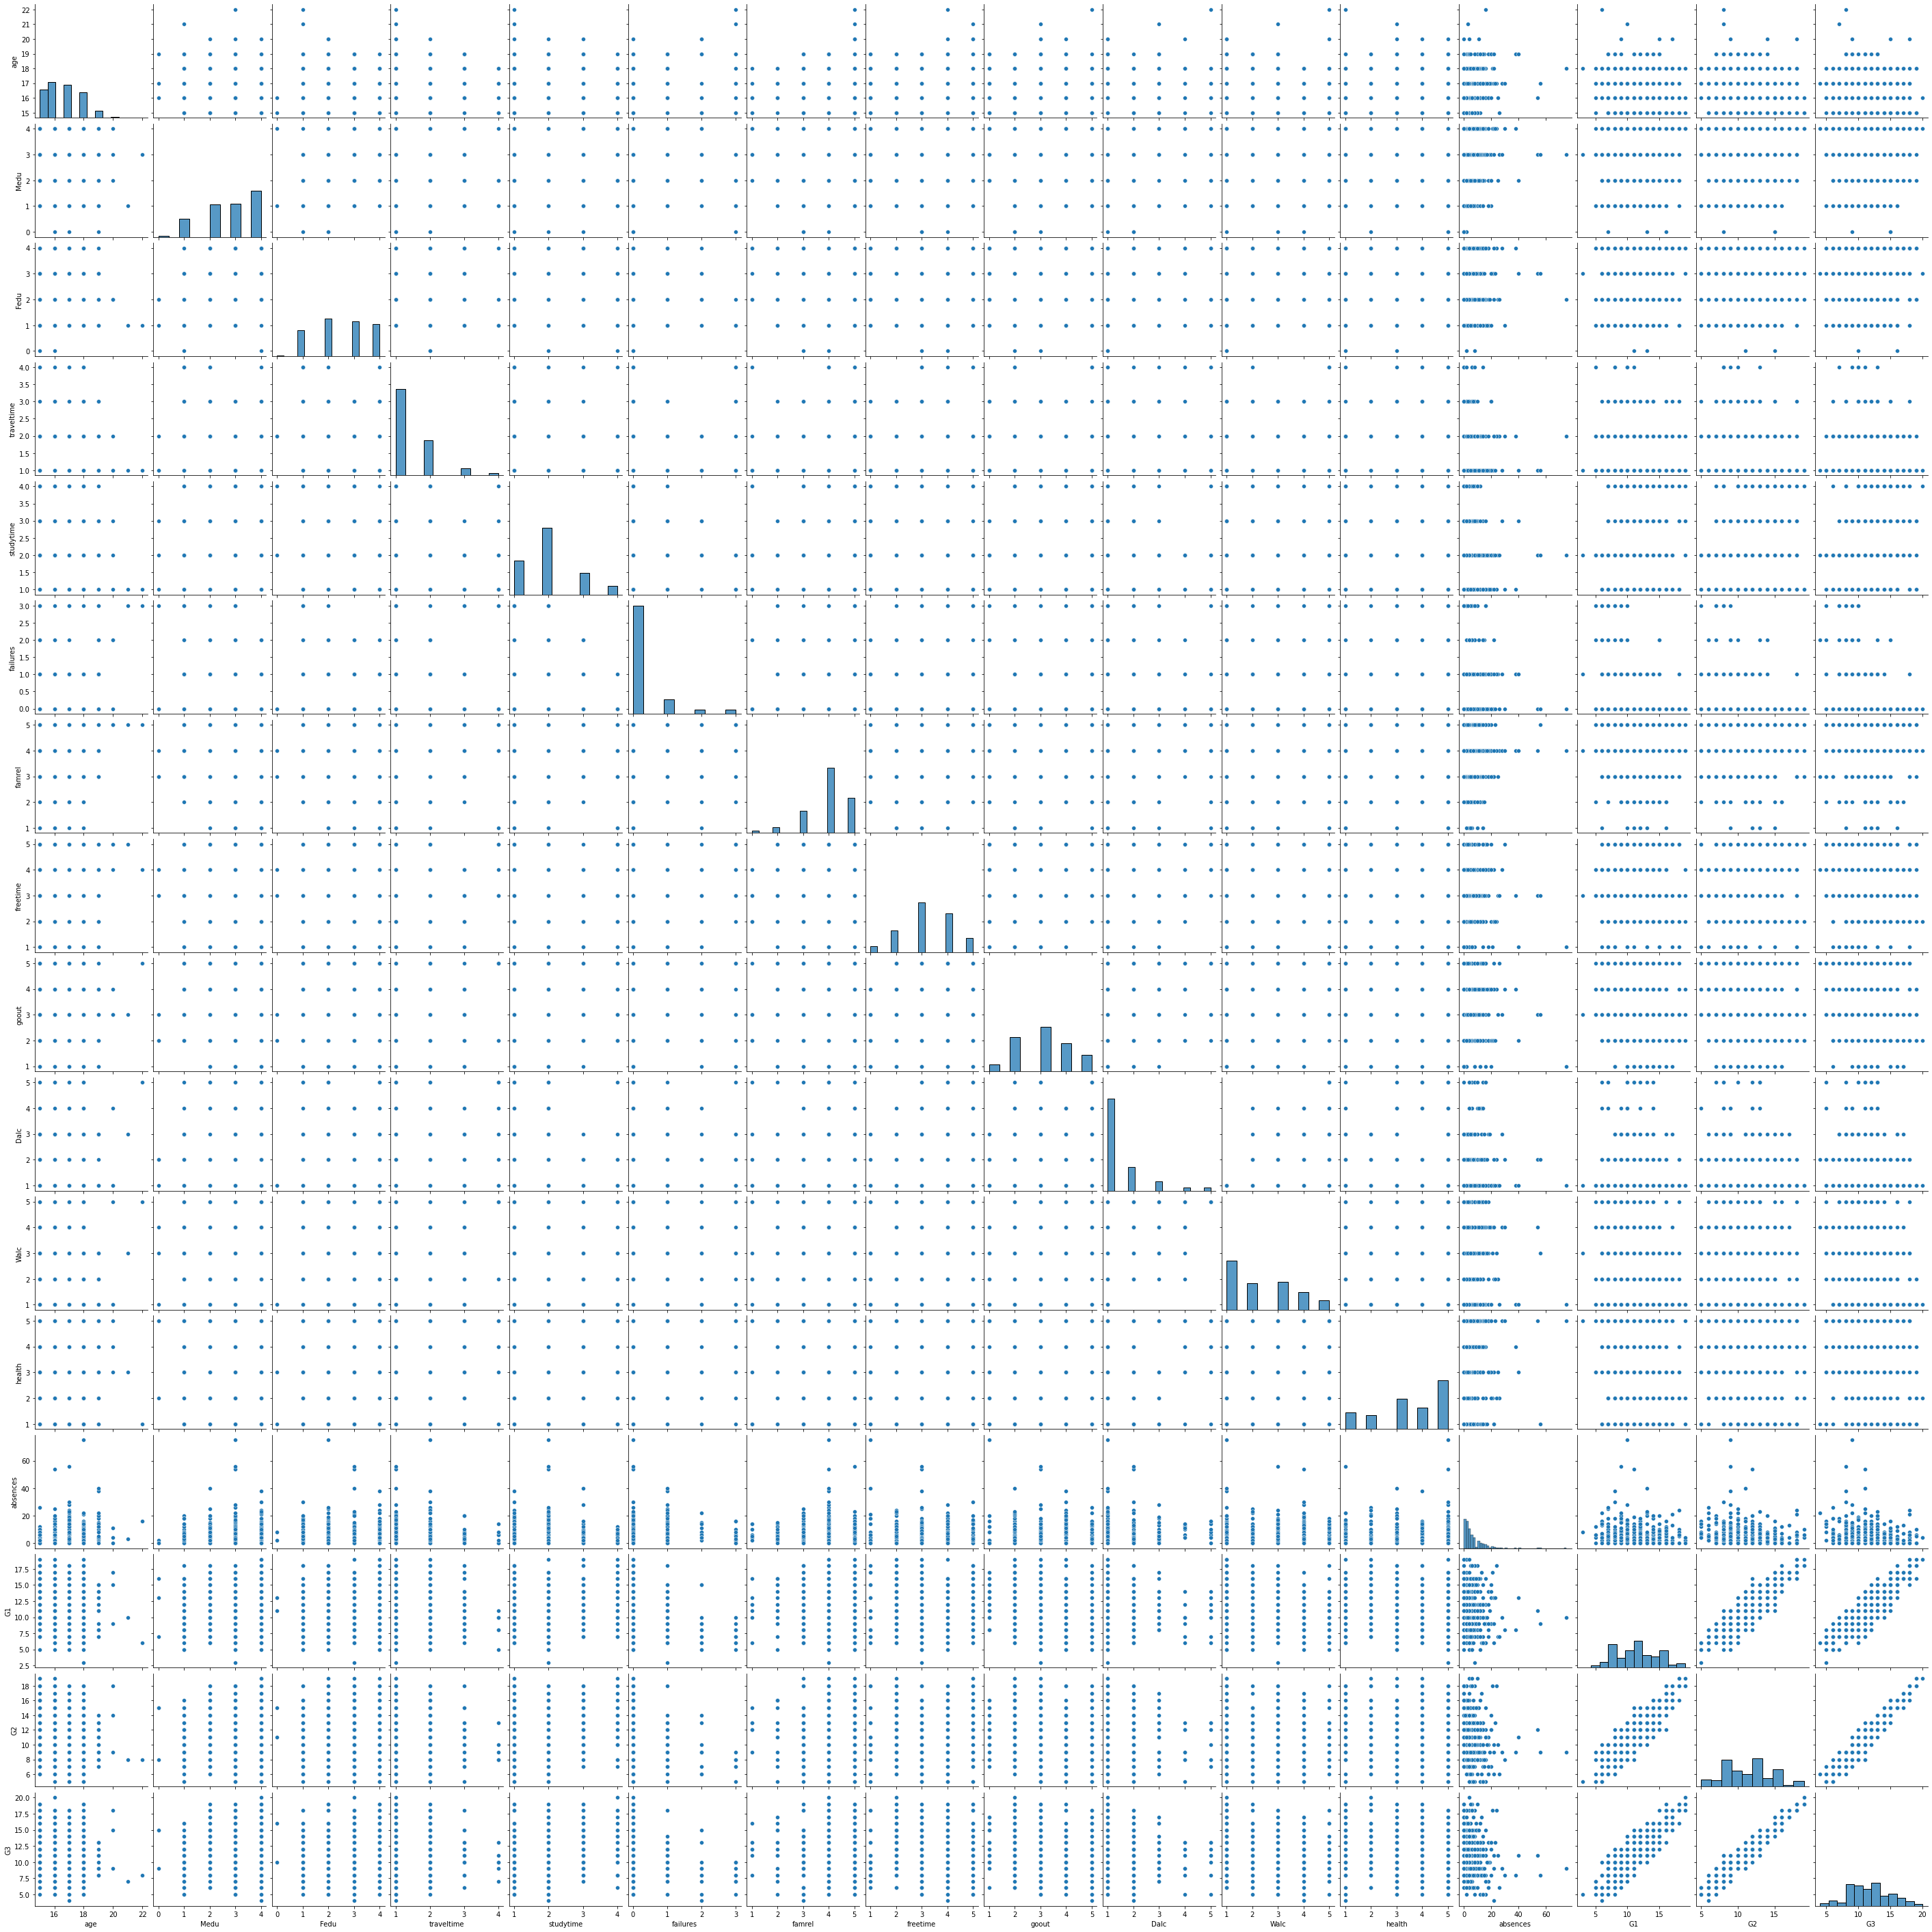

In [9]:
sns.pairplot(student_data)

The pairplot shows that most of the features are categorical features. There is a strong correlation among G3 and G1, G2. The correlations of G3 and other features need more exploration.

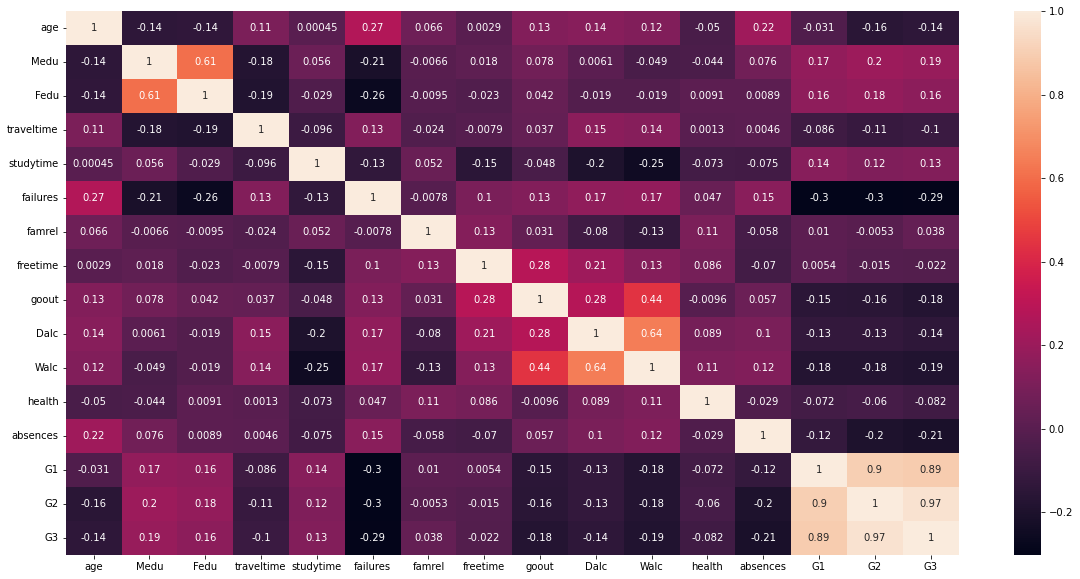

In [10]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(student_data.corr(),annot=True);

#### 3.4.2.1 Continuous variables<a id='3.4.2.1'></a>

**a. age**

The distributioin of G3 at ages are given in the boxplot below. Overall, there is no clear correlation between age and G3, which comply with the low Pearson correlation of -0.14 in the heatmap.

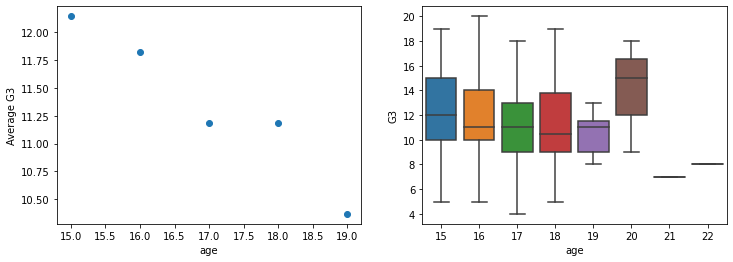

In [11]:
G3_by_age = student_data.groupby('age')['G3'].mean()
G3_by_age = G3_by_age[G3_by_age.index < 20]

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.scatter(G3_by_age.index, G3_by_age, label='G3')
ax1.set_xlabel('age')
ax1.set_ylabel('Average G3')

ax2 = fig.add_subplot(122)
sns.boxplot(x='age',y='G3',data=student_data,ax=ax2)
plt.show();

We also observed that there are limited data for age 21 and 22. The function below shows that the we only have 1 student at 21, 1 student at 22, 3 students at 20. If we remove the these five datapoints, we may have a better correlation between age and G3 as shown in the scatter plot above.

In [12]:
student_data.age.value_counts()

16    97
17    90
15    76
18    70
19    19
20     3
22     1
21     1
Name: age, dtype: int64

In [13]:
student_data = student_data[student_data['age'] < 20]
student_data.age.value_counts()

16    97
17    90
15    76
18    70
19    19
Name: age, dtype: int64

**b. absences**

The average G3 per absence is calculated and plotted below. Two outliers with average G3 of approximately 18 can be observed. Excluding these two outliers, we can see that the G3 is decreasing with the increasing absences.

In [14]:
G3_by_absences = student_data.groupby('absences')['G3'].mean()

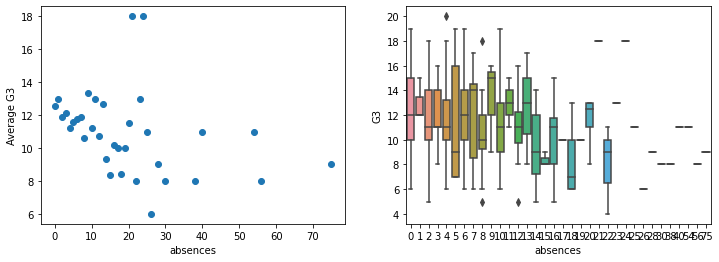

In [15]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.scatter(G3_by_absences.index, G3_by_absences, label='G3')
ax1.set_xlabel('absences')
ax1.set_ylabel('Average G3')

ax2 = fig.add_subplot(122)
sns.boxplot(x='absences',y='G3',data=student_data,ax=ax2)
plt.show();

**c. G1**

A strong correlation between G1 and G3 is observed from the plot below.

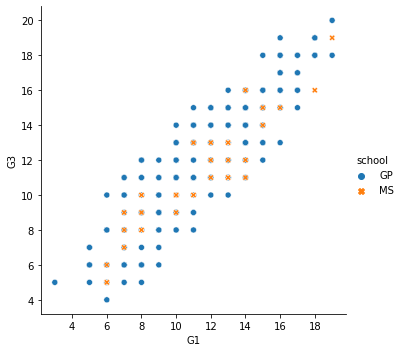

In [16]:
sns.relplot(x='G1',y='G3',data=student_data,
            kind='scatter',hue='school',style='school');

**d. G2**

The correlation between G2 and G3 is even stronger than that of G1 and G3 as demonstrated by the shinked bandwidth.

However, there is also a stong correlation between G1 and G2. We may need to remove one of them in the modeling.

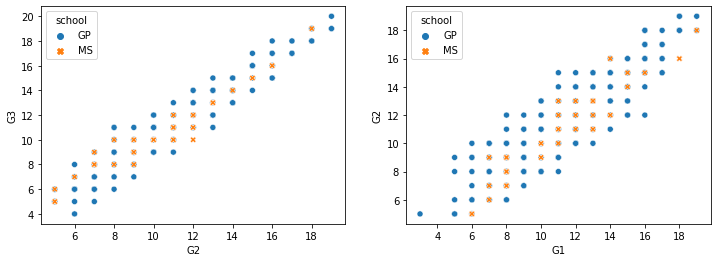

In [17]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
sns.scatterplot(x='G2',y='G3',data=student_data,
            hue='school',style='school', ax=ax1)
ax2 = fig.add_subplot(122)
sns.scatterplot(x='G1',y='G2',data=student_data,
            hue='school',style='school', ax=ax2);

#### 3.4.2.2 Categorical variables<a id='3.4.2.2'></a>

In [18]:
cat_feature_column = student_data.select_dtypes('object').columns

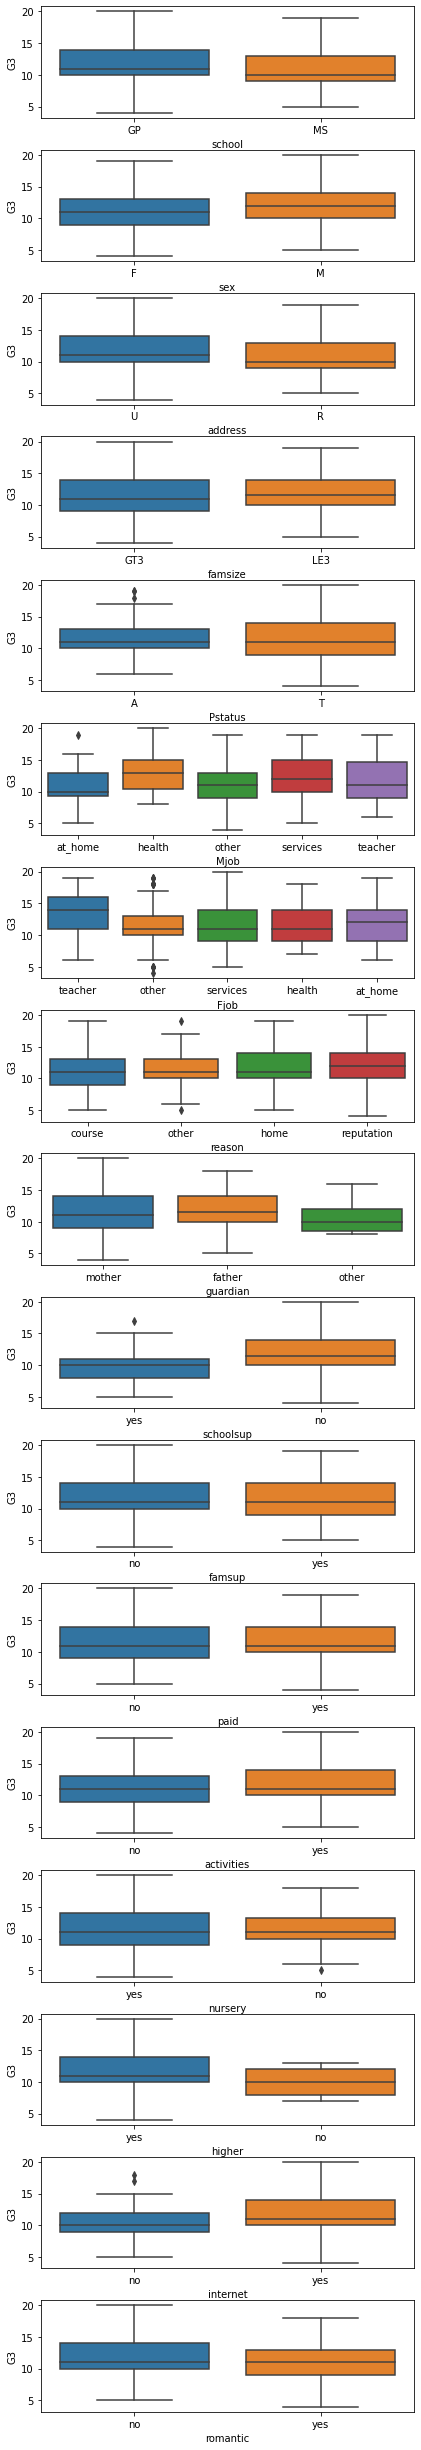

In [28]:
n=len(cat_feature_column)
fig,ax = plt.subplots(n,1, figsize=(6,n*2), sharex=False)
plt.tight_layout()
for i in range(n):
    plt.sca(ax[i])
#     col = cat_feature_column[i]
    sns.boxplot(x=cat_feature_column[i],y='G3',data=student_data);

**Special Case**

We treat Medu, Fedu, famrel, freetime, goout, Dalc, Walc, health as numerical variables as their values show the trend of these features.

In [46]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [48]:
col_info.T

,meaning,notes
name,,
school,student's school,binary: 'GP' - Gabriel Pereira or 'MS' - Mousi...
sex,student's sex,binary: 'F' - female or 'M' - male
age,student's age,numeric: from 15 to 22
address,student's home address type,binary: 'U' - urban or 'R' - rural
famsize,family size,binary: 'LE3' - less or equal to 3 or 'GT3' - ...
Pstatus,parent's cohabitation status,binary: 'T' - living together or 'A' - apart
Medu,mother's education,"numeric: 0 - none, 1 - primary education 4th g..."
Fedu,father's education,"numeric: 0 - none, 1 - primary education 4th g..."
Mjob,mother's job,"nominal: 'teacher', 'health' care related, civ..."


Function below is defined for plot G3 vs. numerical variables.

In [50]:
def Average_plot_variable(feature, data):
    info = data.groupby(feature)['G3'].mean()

    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax1.scatter(info.index, info, label=feature)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Average G3')

    ax2 = fig.add_subplot(122)
    sns.boxplot(x=feature,y='G3',data=student_data,ax=ax2)
    plt.show();

**Medu & Fedu** : mother's and father's eduction. 0 - none, 1 - primary education 4th g..

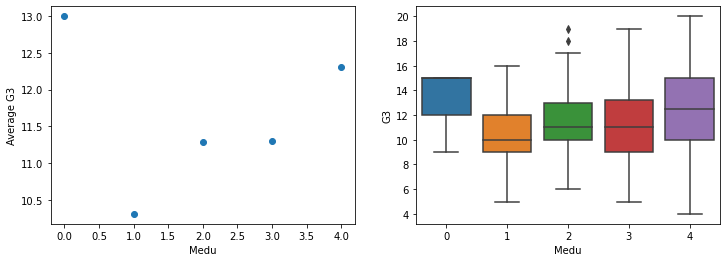

In [51]:
Average_plot_variable('Medu', student_data)

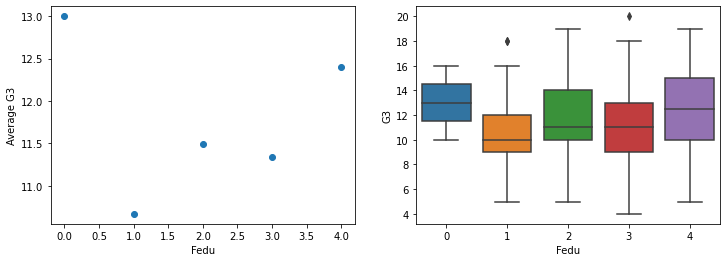

In [59]:
Average_plot_variable('Fedu', student_data)

In [64]:
student_data[(student_data.Medu == 0) | (student_data.Fedu == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
154,GP,M,16,U,GT3,T,1,0,other,other,...,4,3,2,1,1,3,2,13,15,16
227,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
296,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,16,15,15


It is intereting that as Medu & Fedu increase from 1 to 4, G3 has a strong trend to increase. But students with Fedu & Medu of zero have even higher G3 compared to students with Fedu & Medu larger than zero. However, we only have five datapoints for Fedu=0 or Medu=0. 

**traveltime**: home to school travel time. 1 - <15 min., 2 - 15 to 30 min., 3 - ...

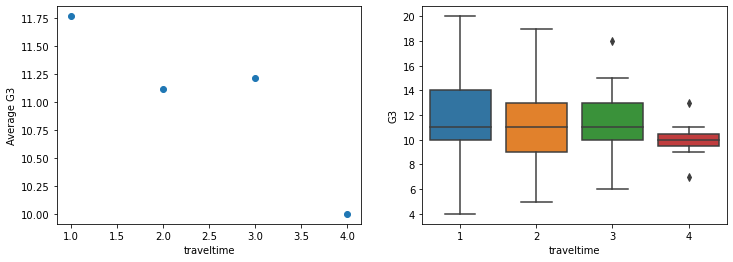

In [79]:
Average_plot_variable('traveltime', student_data)

**studytime**: weekly study time . 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5...

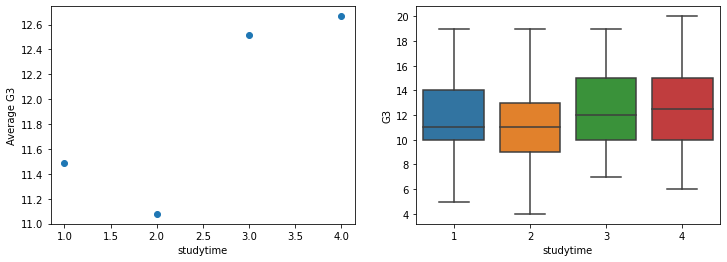

In [77]:
Average_plot_variable('studytime', student_data)

**failures**: number of past class failures.  n if 1<=n<3, else 4

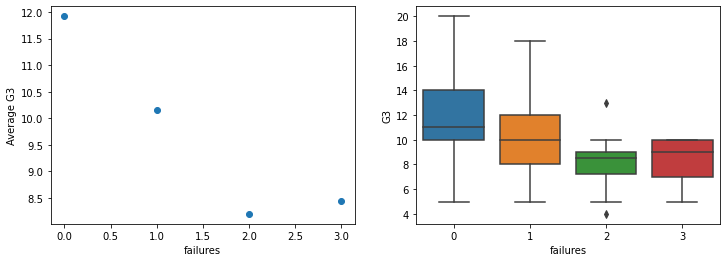

In [75]:
Average_plot_variable('failures', student_data)

**famrel**: quality of family relationships. from 1 - very bad to 5 - excellent

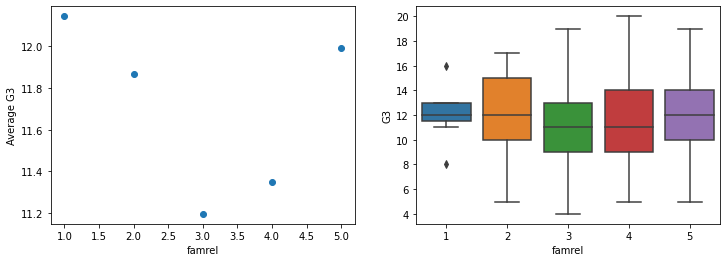

In [58]:
Average_plot_variable('famrel', student_data)

In [66]:
student_data.famrel.value_counts()

4    178
5     91
3     61
2     15
1      7
Name: famrel, dtype: int64

There is only one point for famrel = 1. By excluding this point, the trend is still not clear.

**freetime: free time after school**

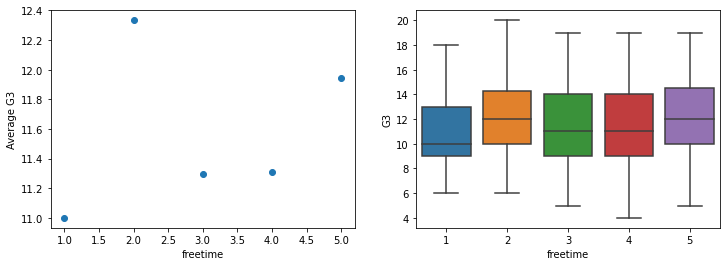

In [57]:
Average_plot_variable('freetime', student_data)

**goout: going out with friend**

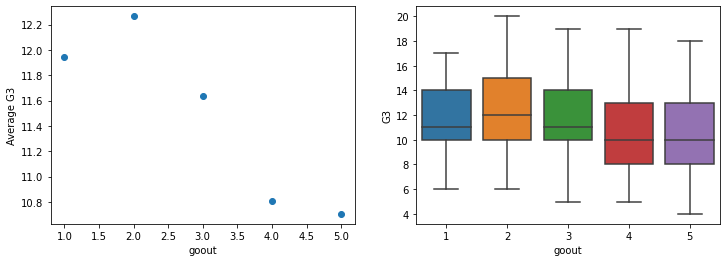

In [56]:
Average_plot_variable('goout', student_data)

In general, the G3 is inversely proportional to the times of going out with friends.

**Dalc & Walc**: workday & weekend alcohol consumption. from 1 - very low to 5 - very high

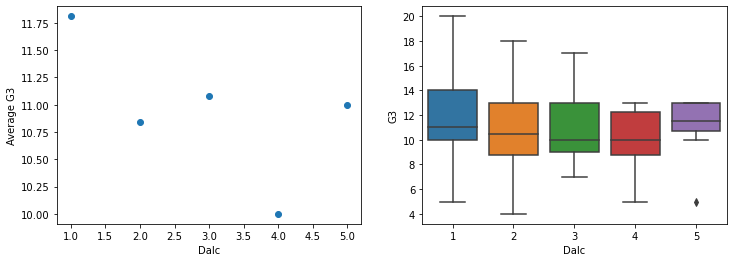

In [53]:
Average_plot_variable('Dalc', student_data)

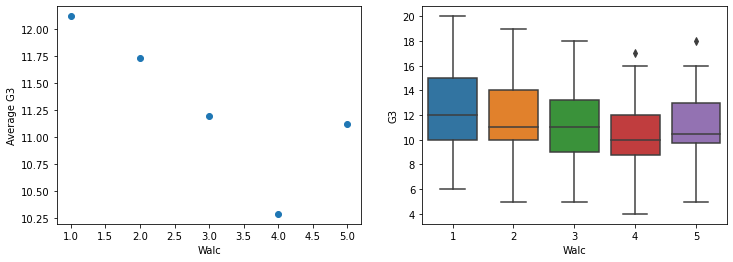

In [55]:
Average_plot_variable('Walc', student_data)

**health**: current health status. from 1 - very bad to 5 - very good

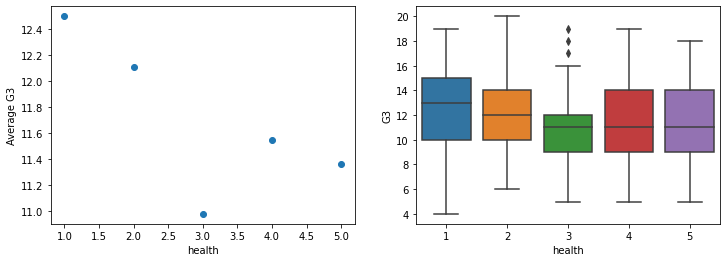

In [52]:
Average_plot_variable('health', student_data)

## 3.5 Summary<a id='3.5'></a>

In this notebook, the target variable is determined to be G3. The correlation among the G3 and the numeric and categorical dependent variables are analyzed, respectively. It has been found that G3 is strongly related to G1 and G2. Also, G1 and G2 are well correlated. In the modeling, one of them may be removed due to the repeatability. The age is analyzed and rows with only 1 or 3 students are dropped from the dataset.A quite weak correlation exist between the G3 and the absences. The correlation between G3 and categorical variabls are present in boxplots.

If we treat certain categorical variables as numerical variables, more correlations are found among G3 and dependent variables as demonstrated in the specal case. Both cases will be tested in the modeling notebook.